In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import csv

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

import pdb

#### Load Raw Sensor Data Collected by Master_Script.py
1. load sensro data
2. Get start time
3. Convert relative time to timestamp
4. Convert timestamp to readable datatime
5. Drop last column which contain NON
6. Plot each IR on each day, and update file: [data_cleaning_remove_IR_baseline](https://docs.google.com/spreadsheets/d/1NqTgOdDNXioINEcSzhHvB3cI5srl5HJQMWzBTLWKRWc/edit#gid=0) (Note: After updated the file, please download this file as .csv file and upload to Github repository: [Raw_Sensory_Data_Analysis](https://github.com/UWaterloo-ASL/Raw_Sensory_Data_Analysis).)

Loading: raw_sensor_data_from_master_script/01_sensor_data__September_14_2018_at_09-00-00.csv


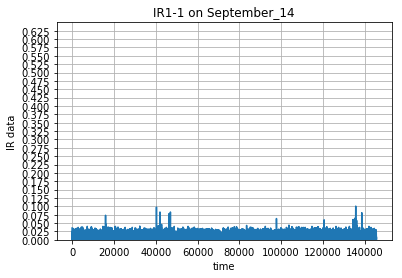

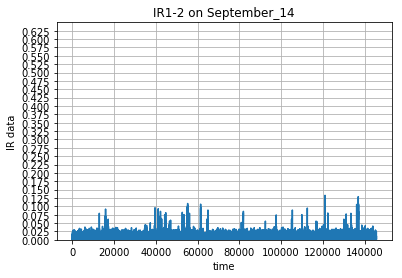

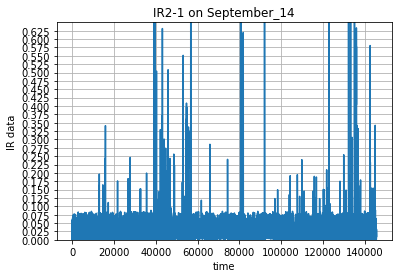

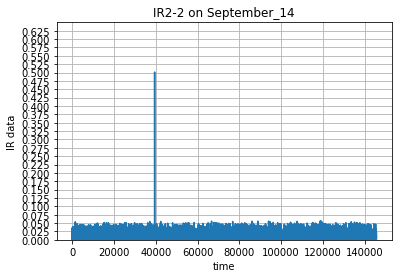

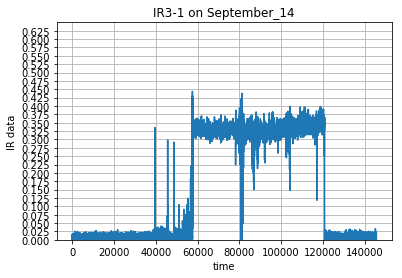

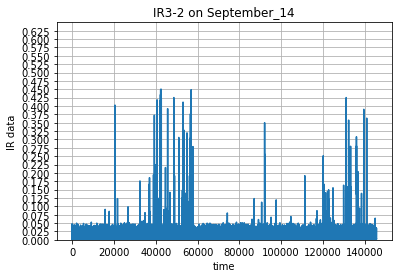

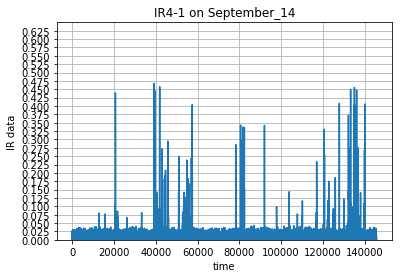

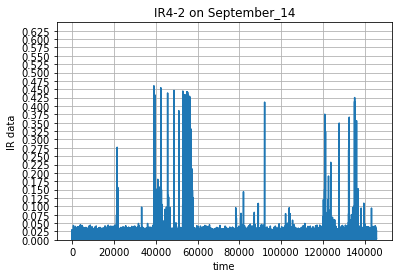

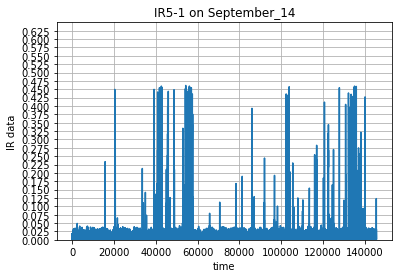

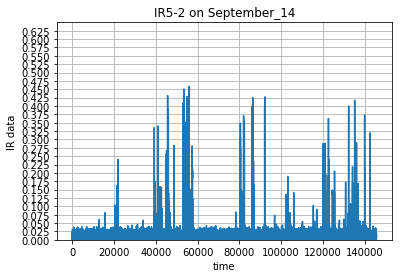

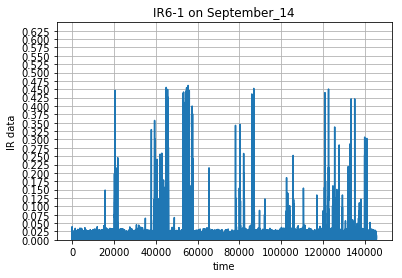

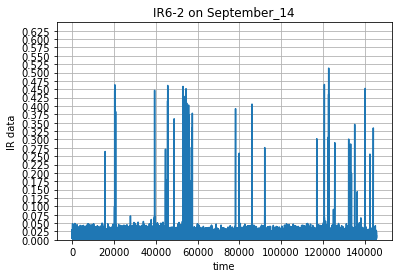

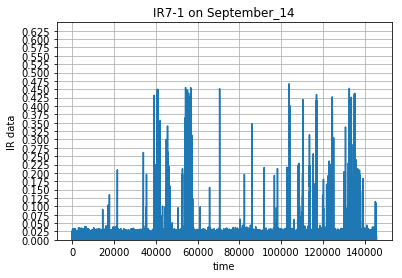

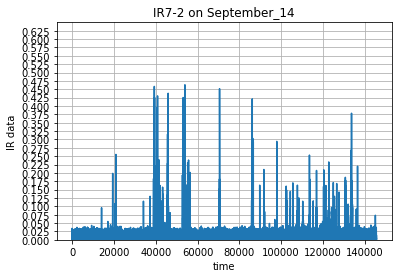

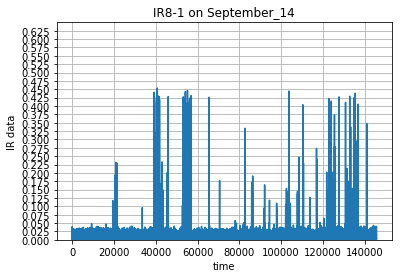

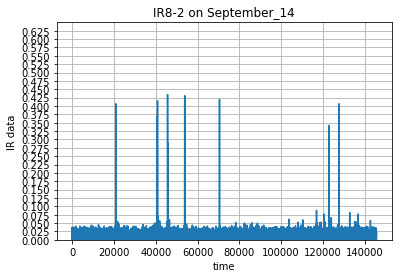

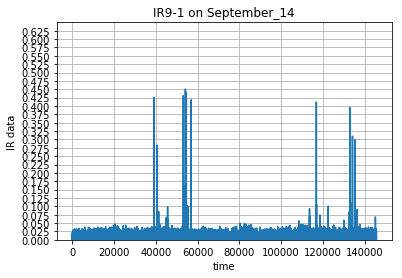

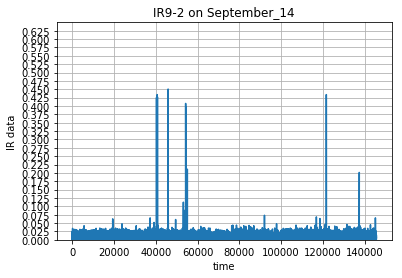

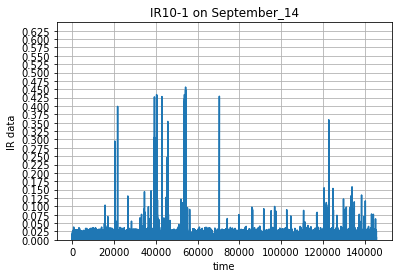

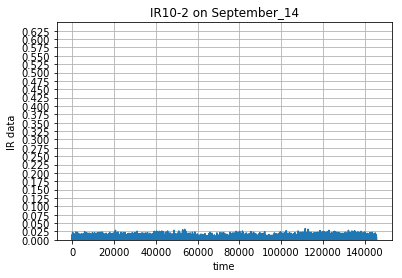

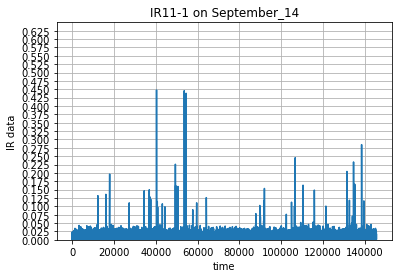

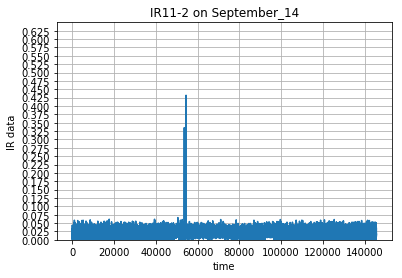

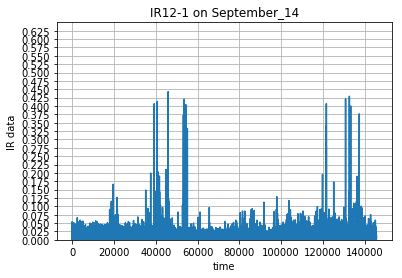

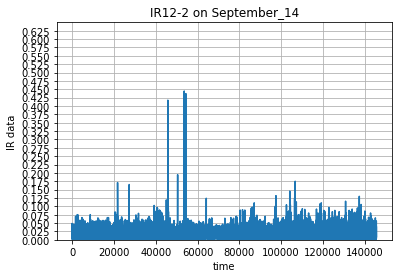

Loading: raw_sensor_data_from_master_script/02_sensor_data__September_17_2018_at_10-20-36.csv


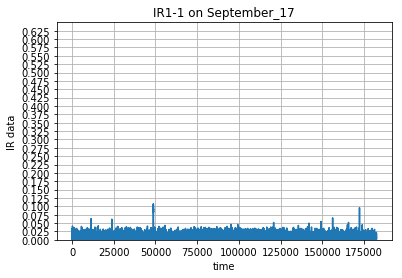

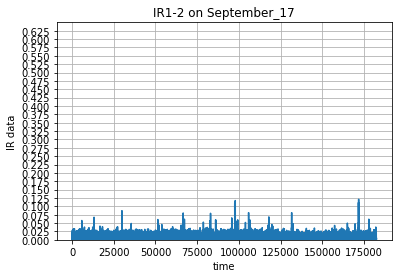

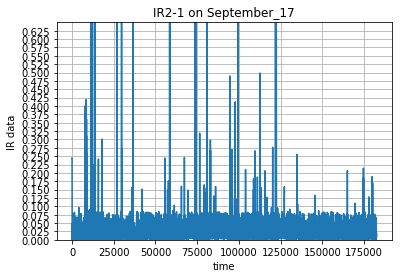

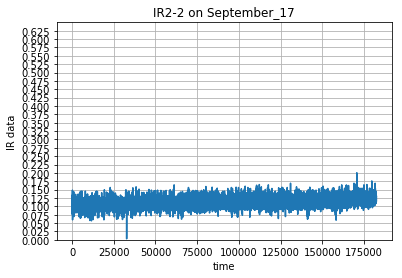

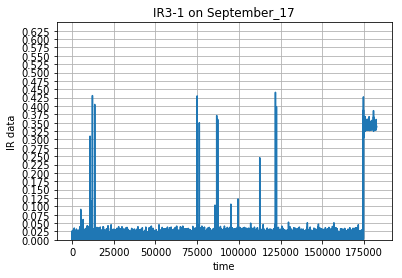

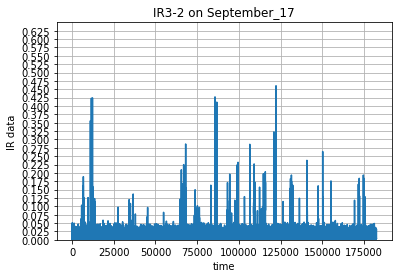

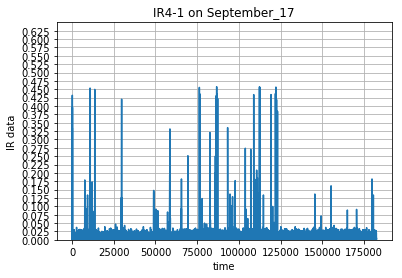

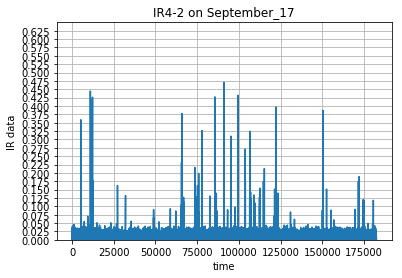

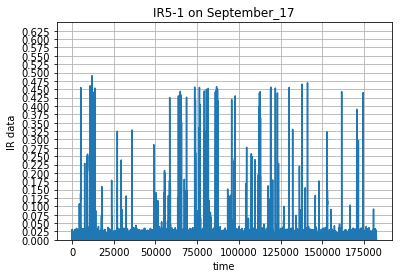

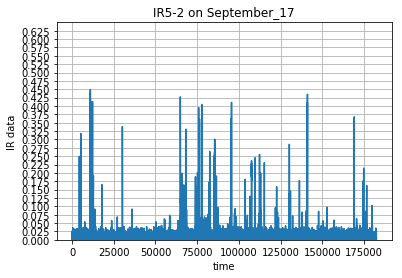

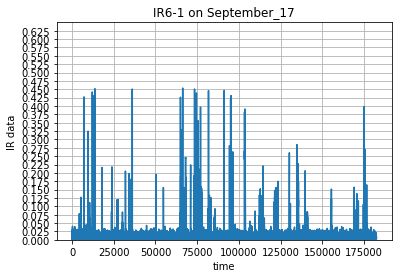

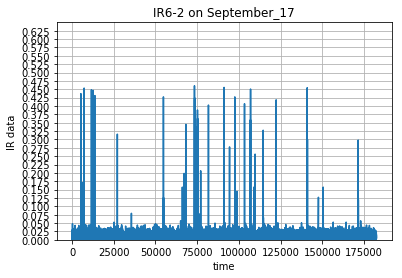

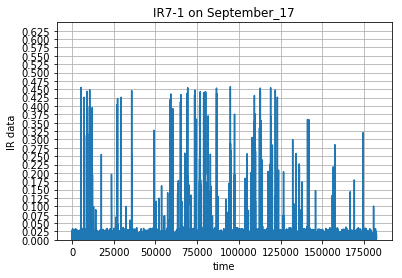

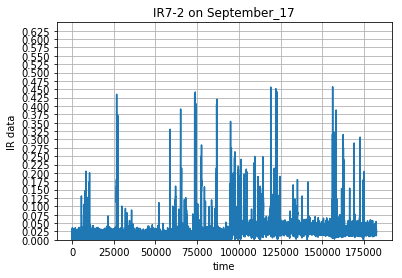

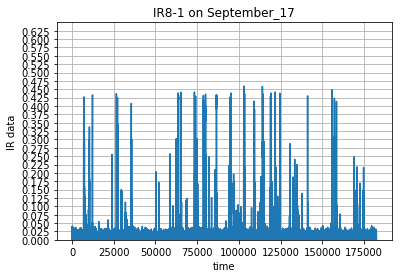

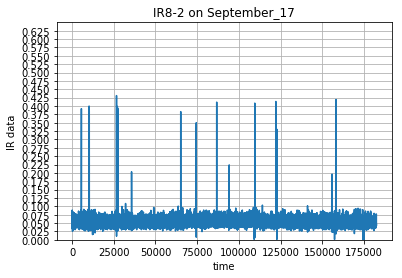

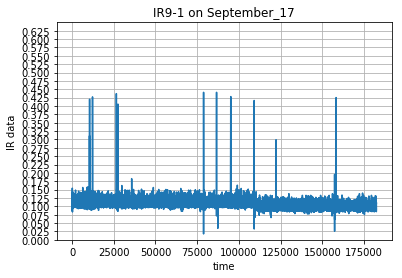

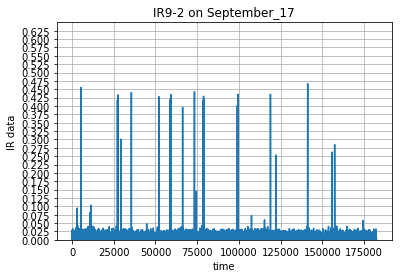

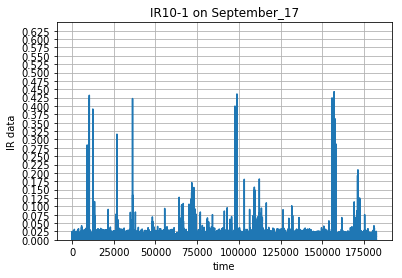

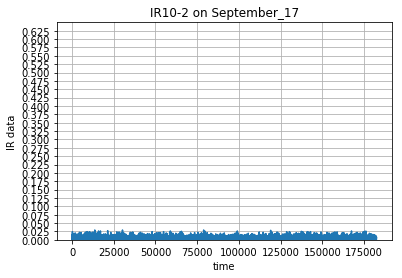

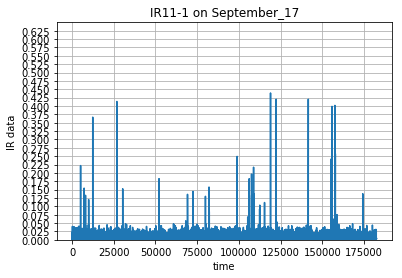

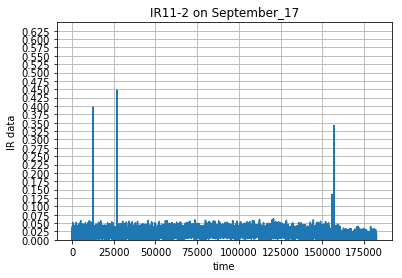

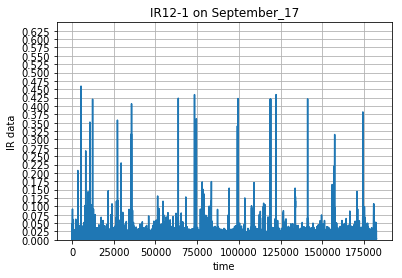

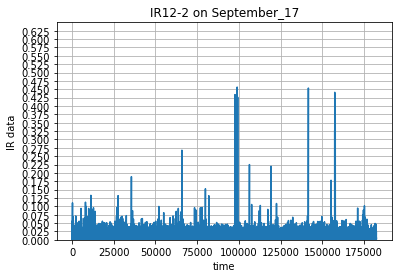

Loading: raw_sensor_data_from_master_script/03_sensor_data__September_18_2018_at_11-33-32.csv


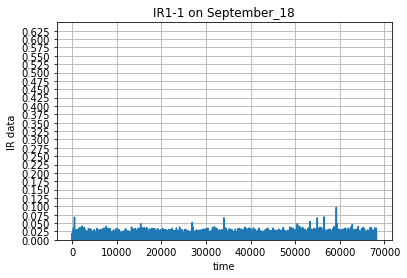

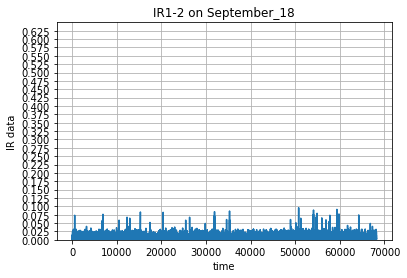

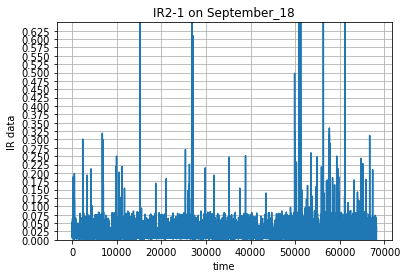

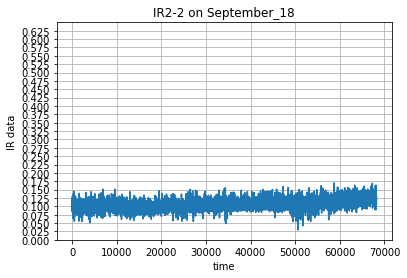

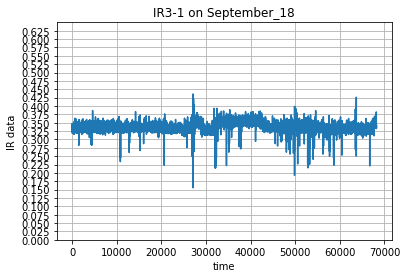

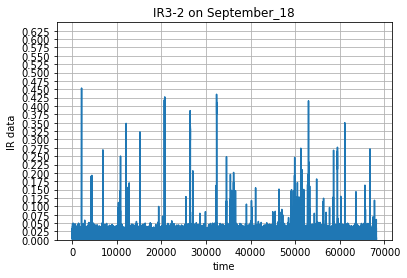

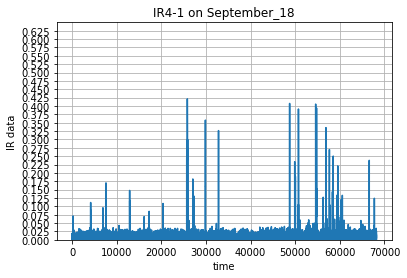

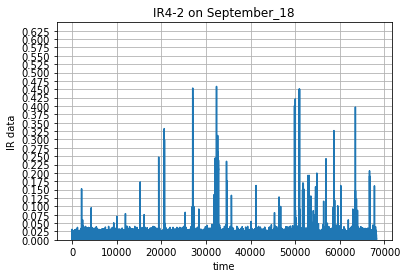

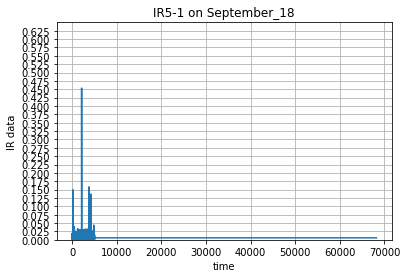

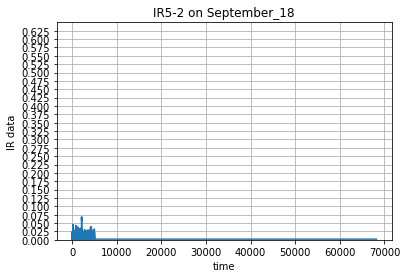

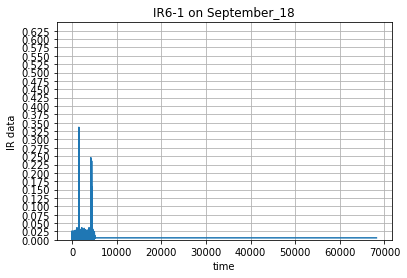

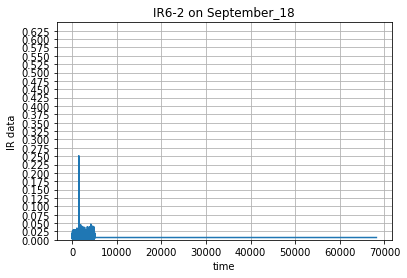

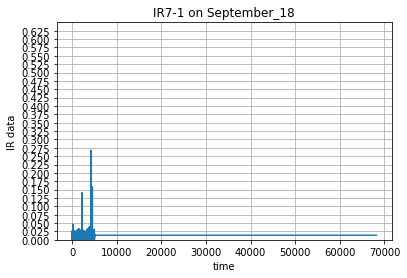

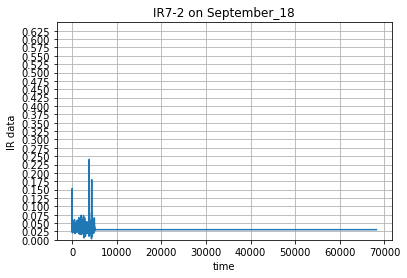

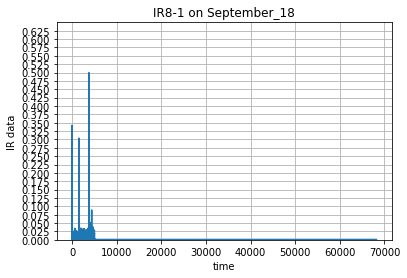

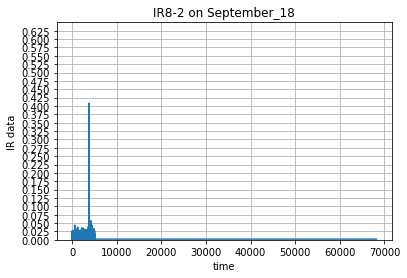

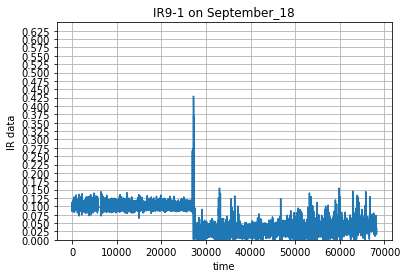

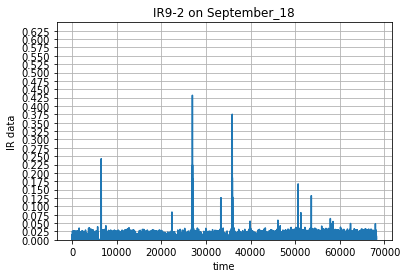

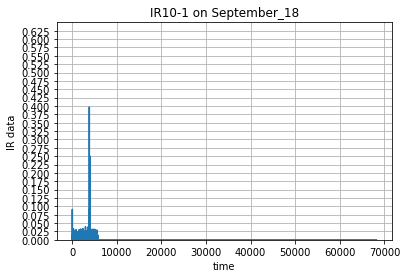

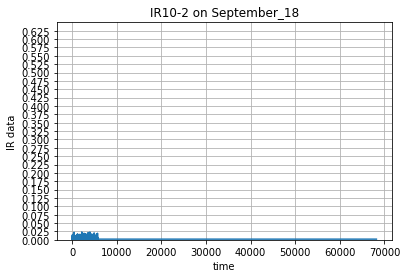

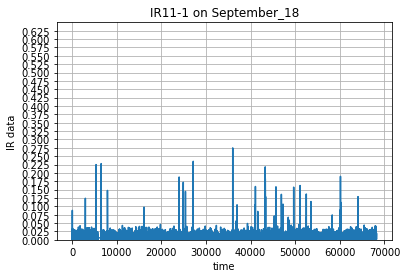

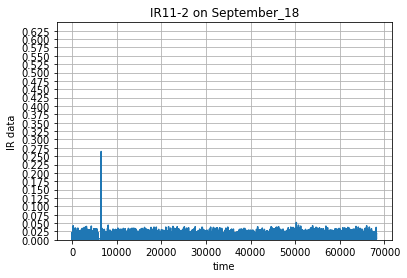

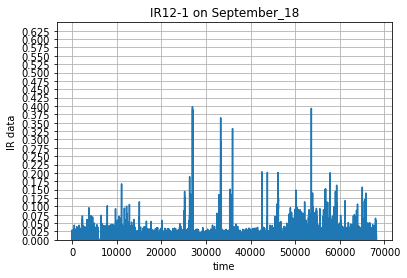

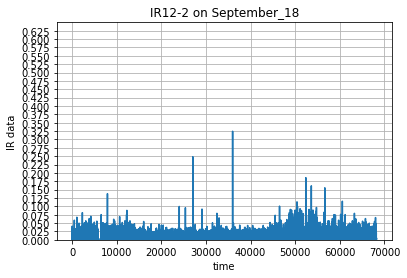

Loading: raw_sensor_data_from_master_script/04_sensor_data__September_19_2018_at_09-33-44.csv


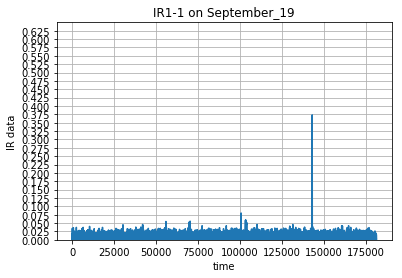

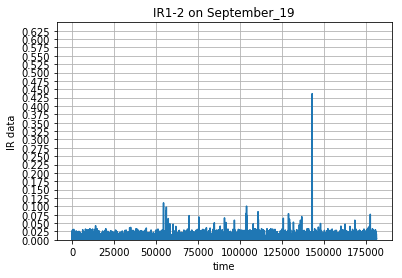

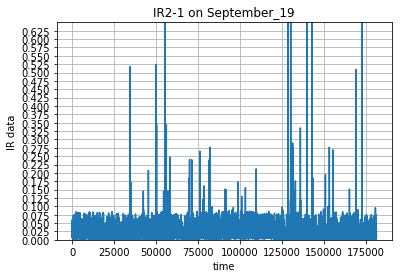

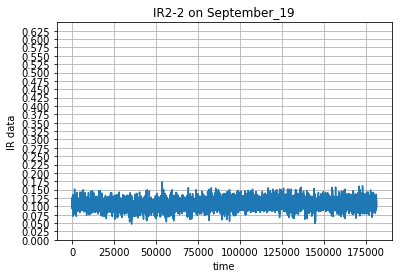

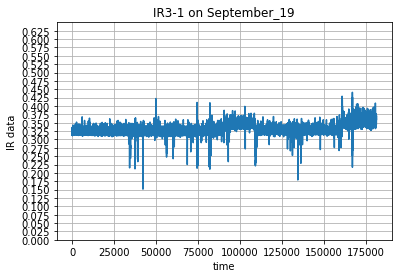

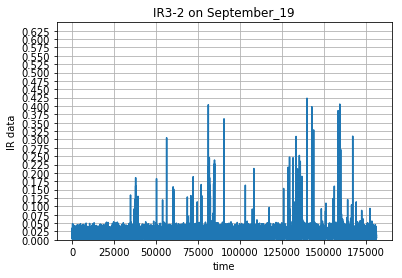

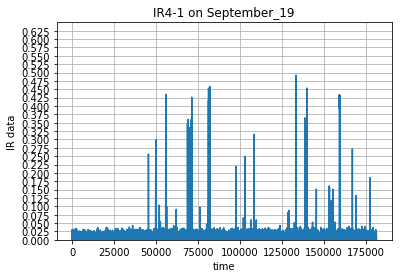

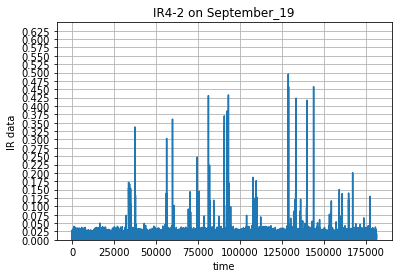

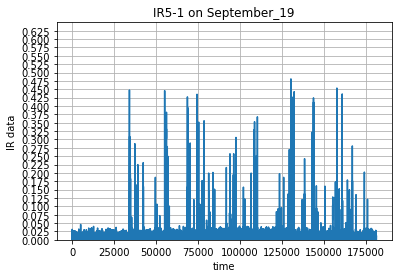

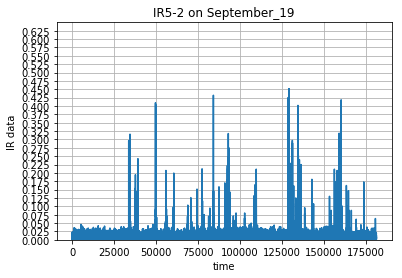

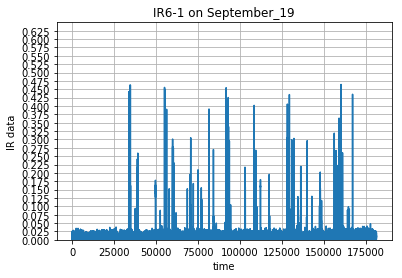

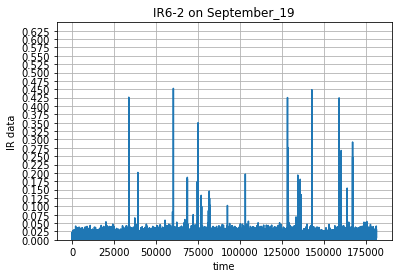

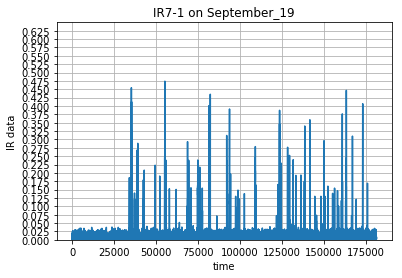

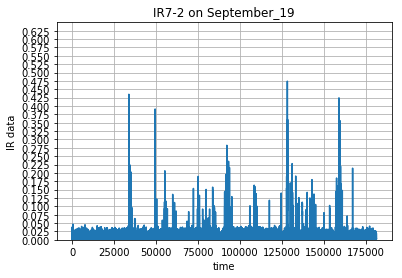

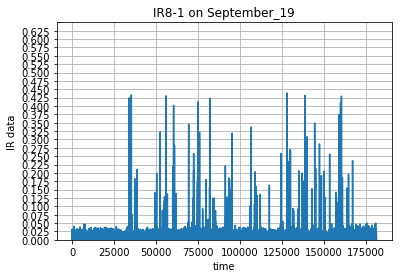

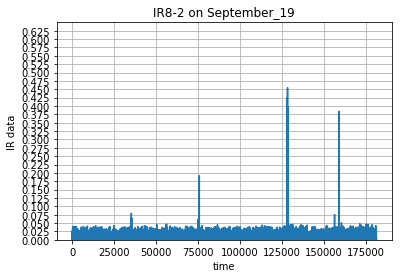

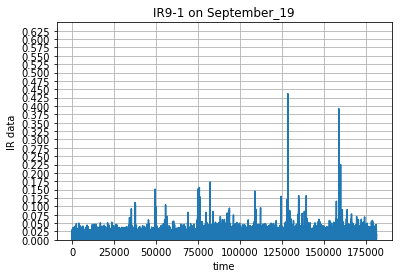

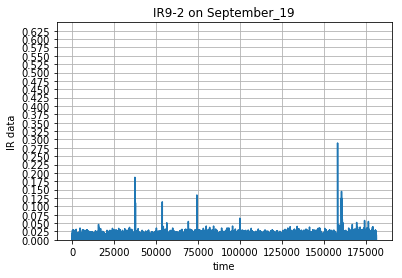

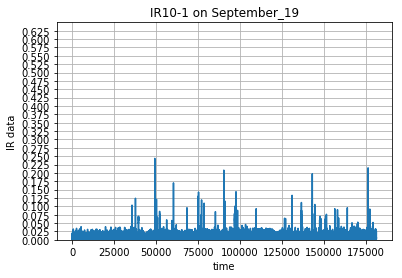

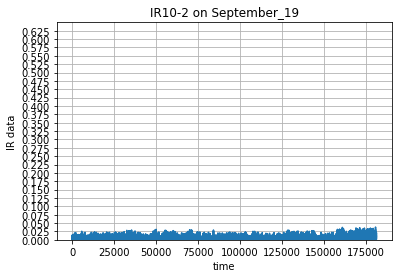

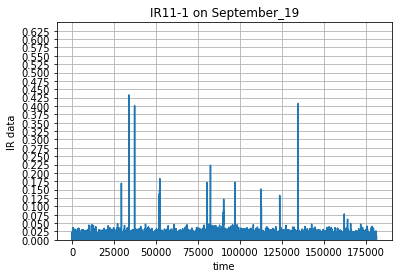

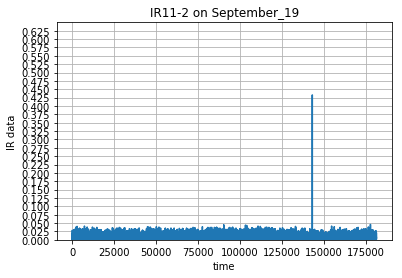

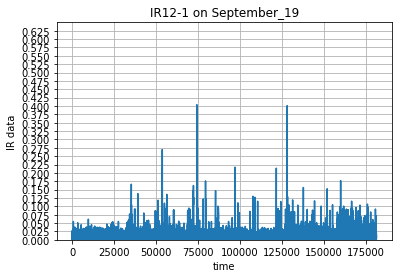

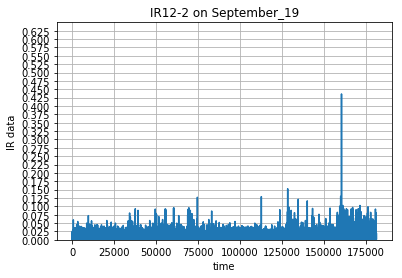

Loading: raw_sensor_data_from_master_script/05_sensor_data__September_20_2018_at_12-58-58.csv


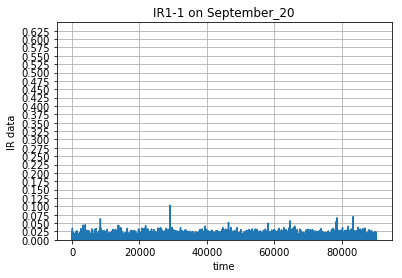

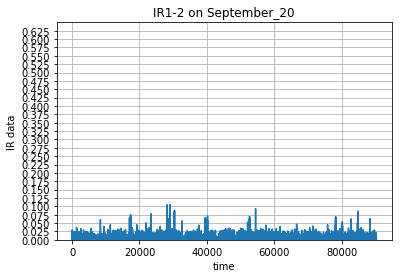

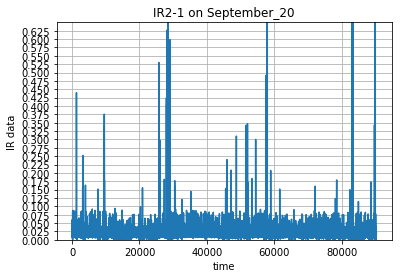

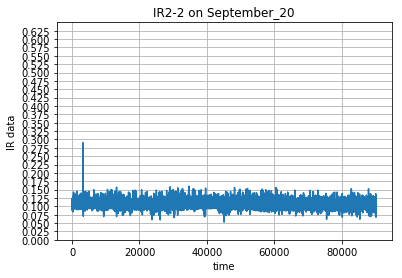

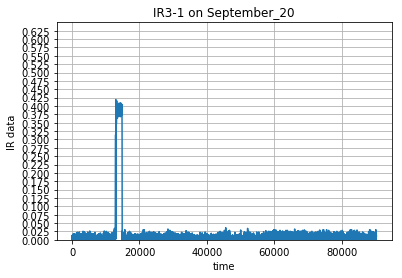

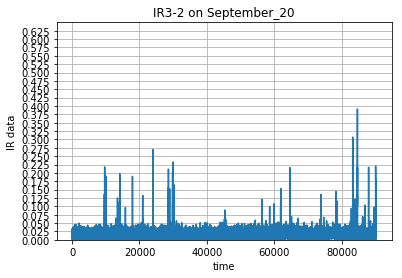

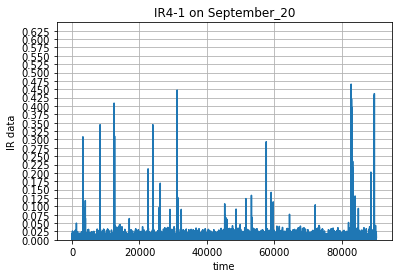

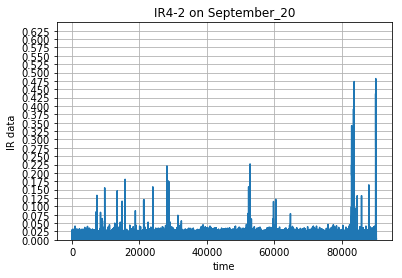

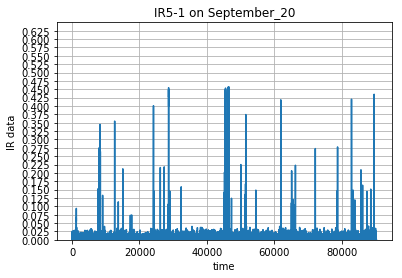

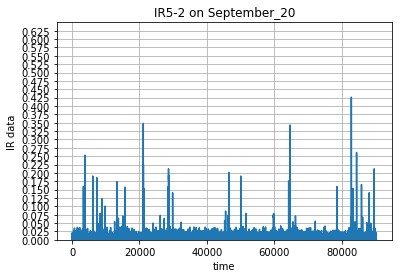

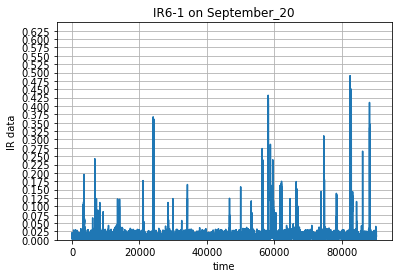

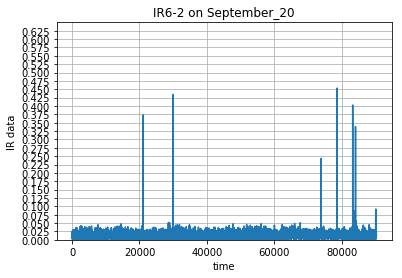

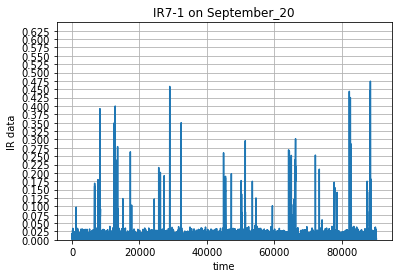

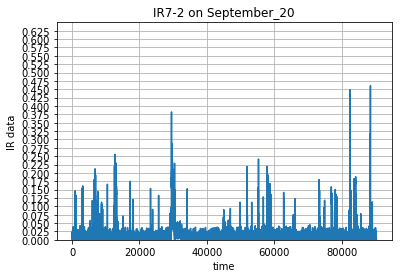

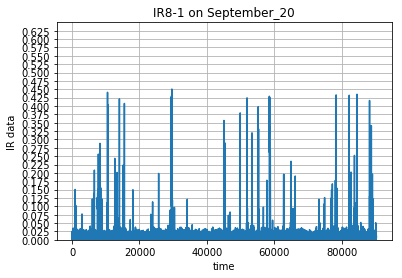

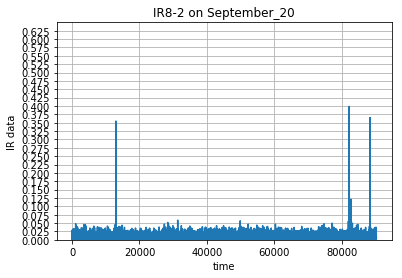

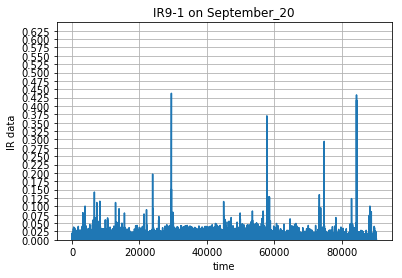

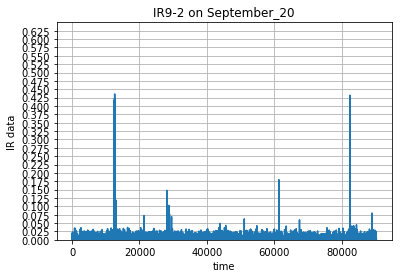

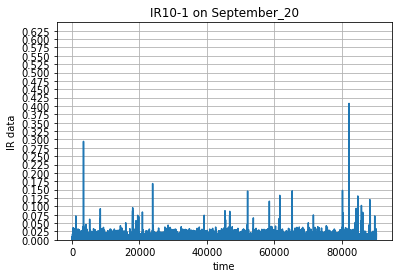

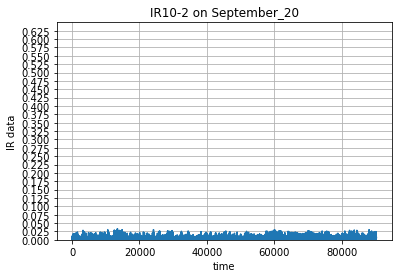

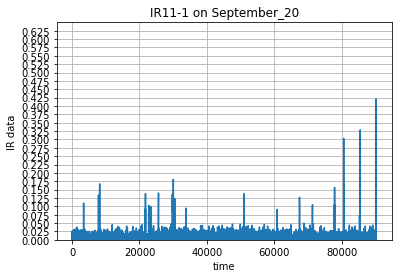

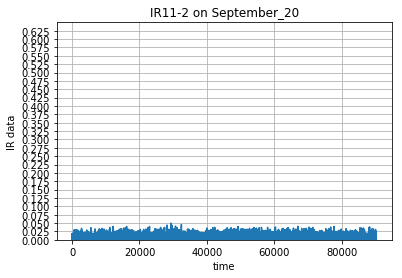

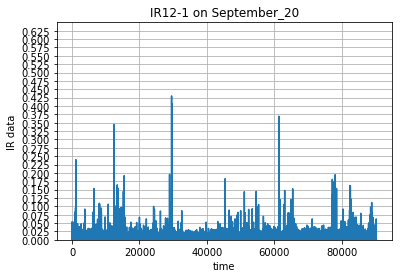

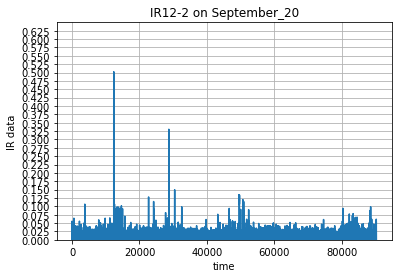

Loading: raw_sensor_data_from_master_script/06_sensor_data__September_21_2018_at_12-59-00.csv


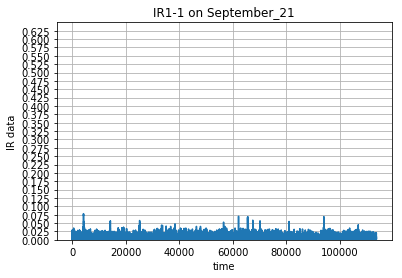

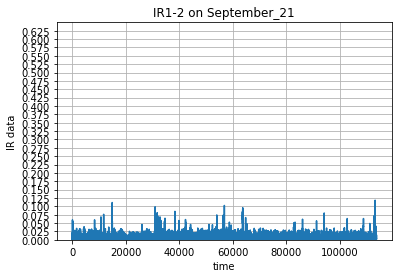

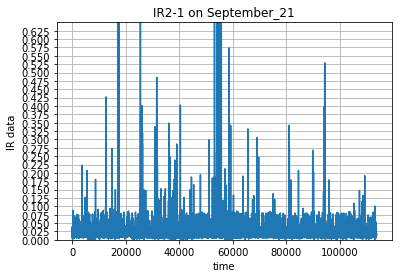

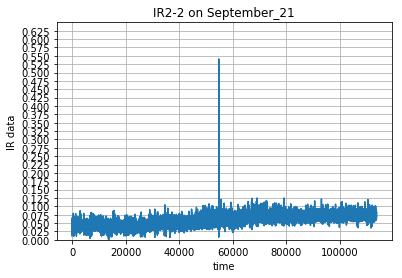

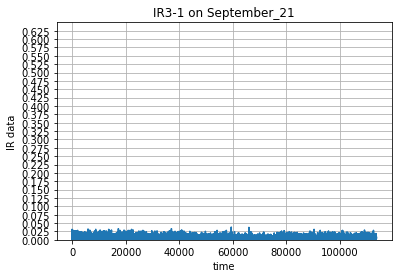

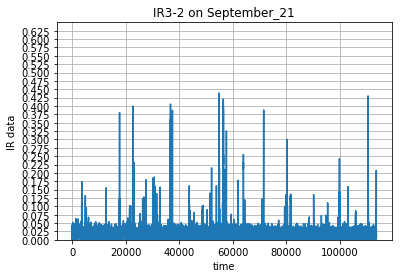

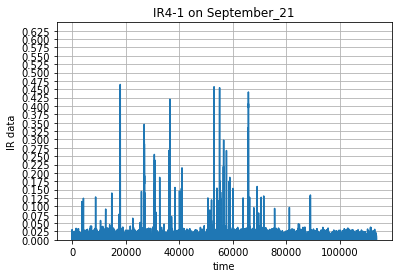

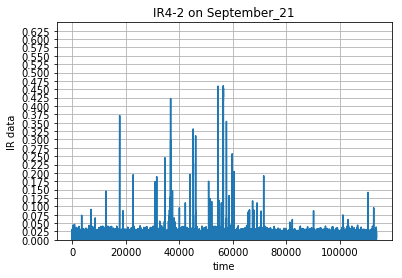

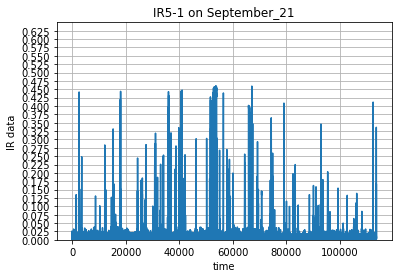

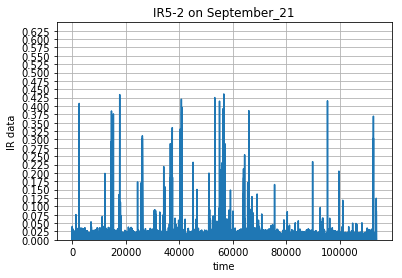

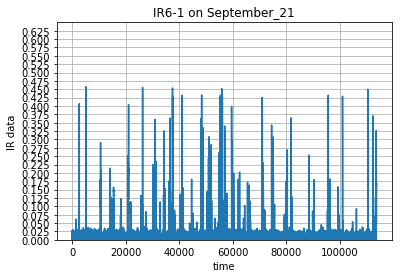

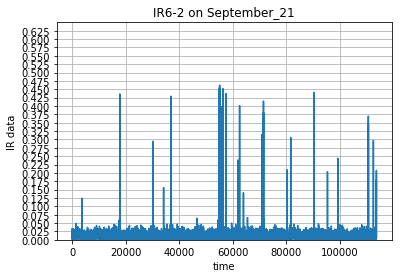

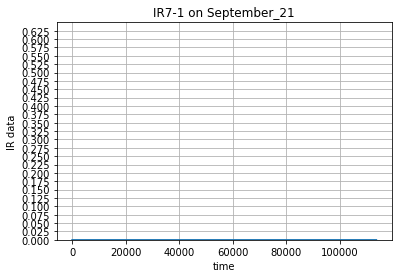

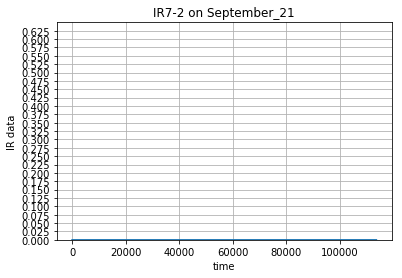

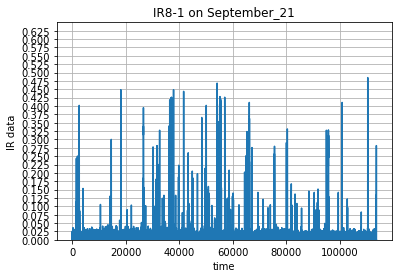

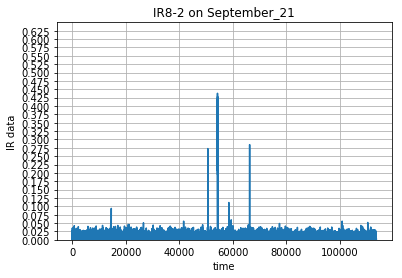

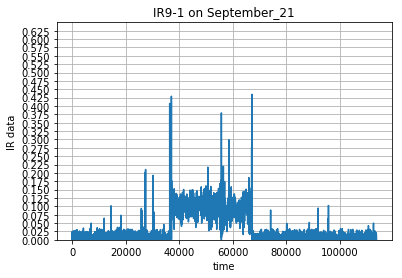

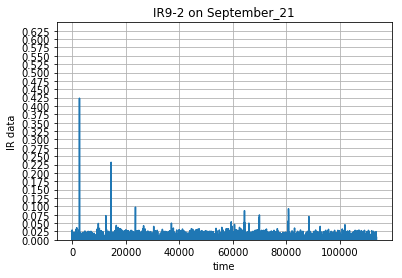

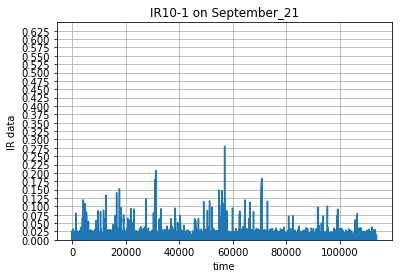

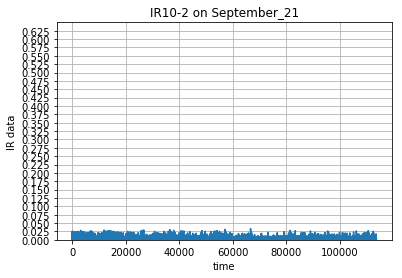

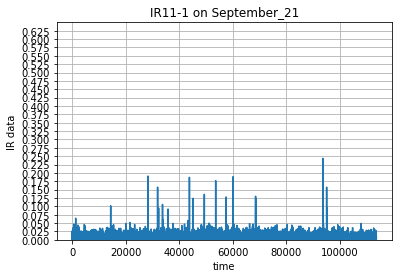

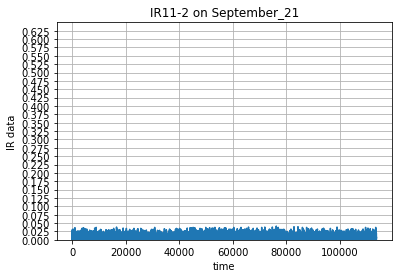

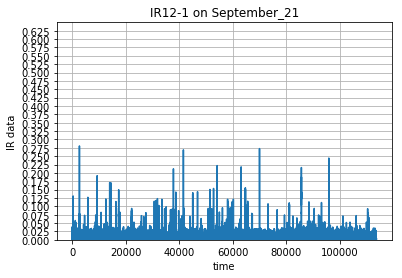

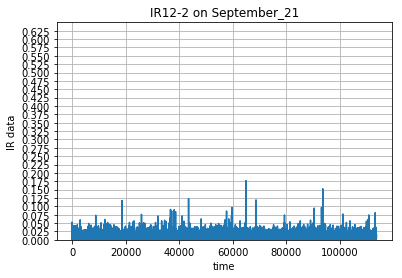

Loading: raw_sensor_data_from_master_script/07_sensor_data__September_24_2018_at_11-45-01.csv


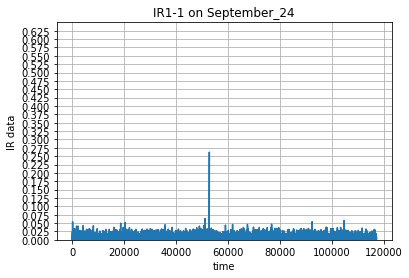

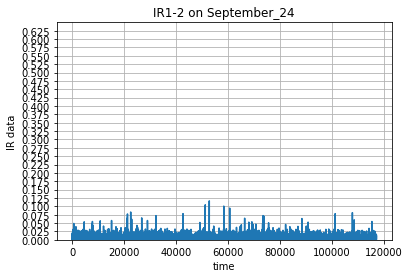

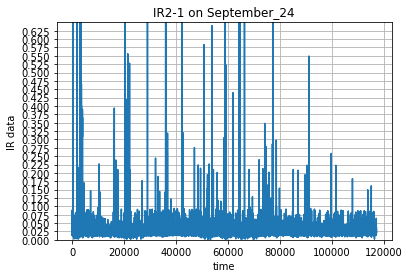

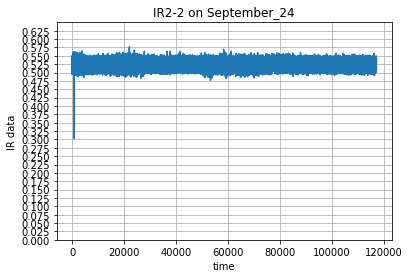

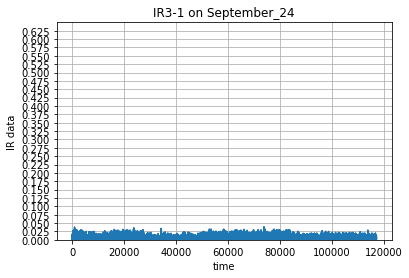

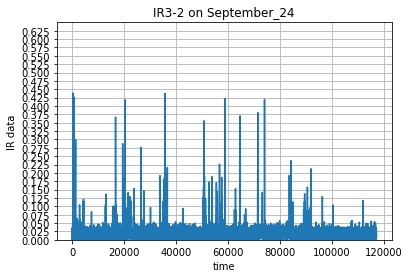

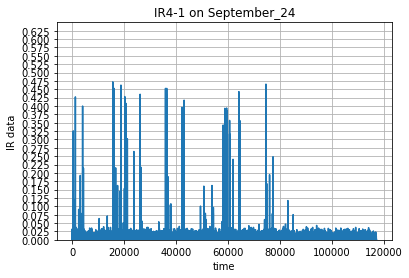

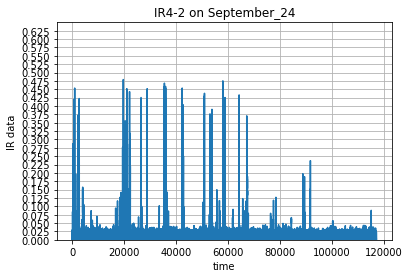

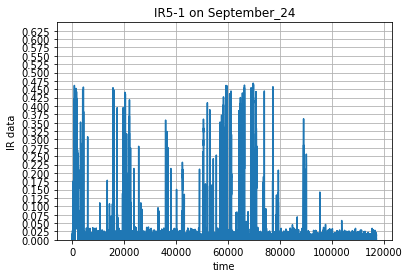

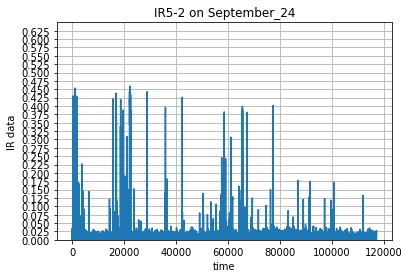

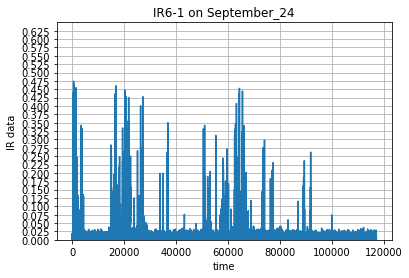

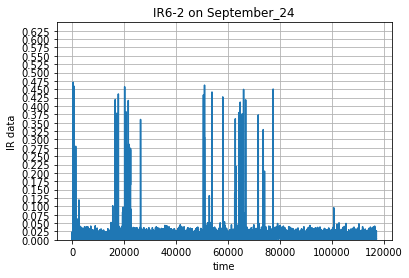

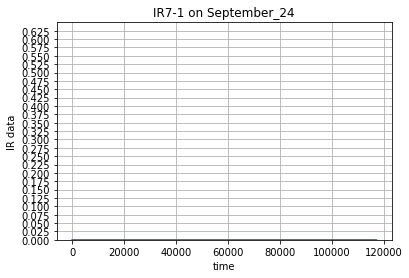

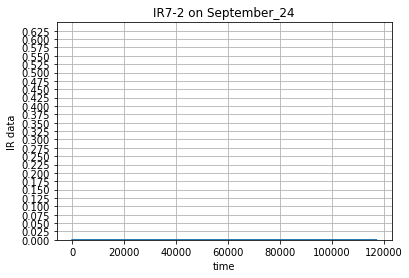

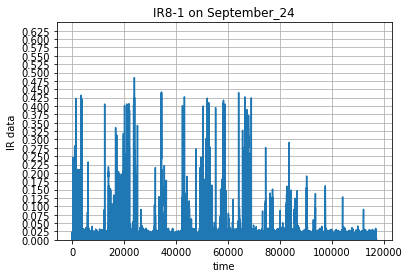

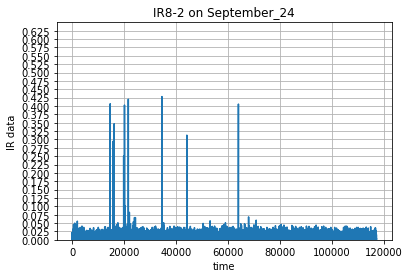

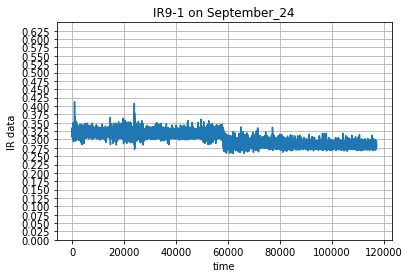

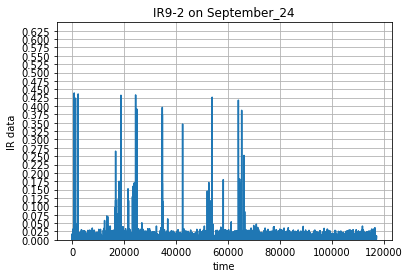

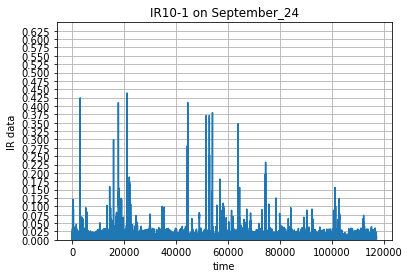

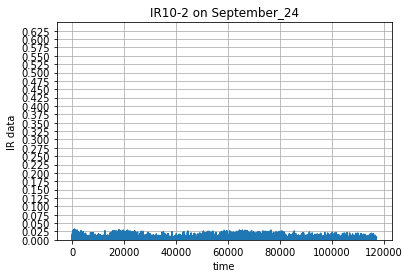

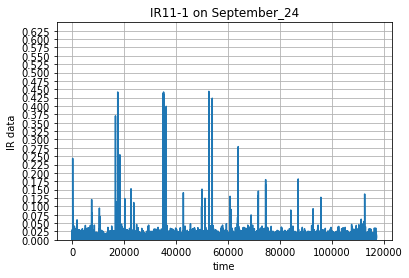

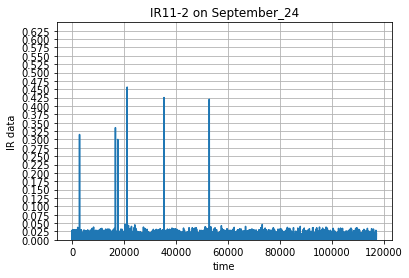

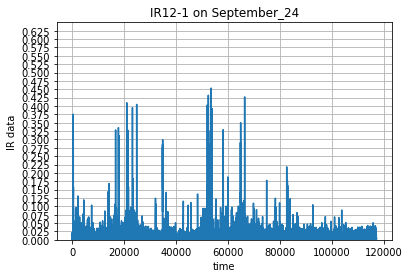

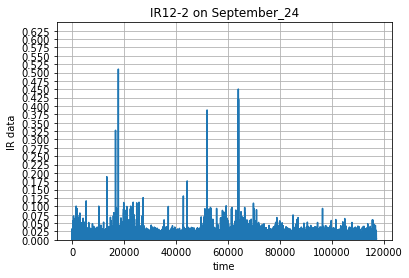

Loading: raw_sensor_data_from_master_script/08_sensor_data__September_25_2018_at_11-17-27.csv


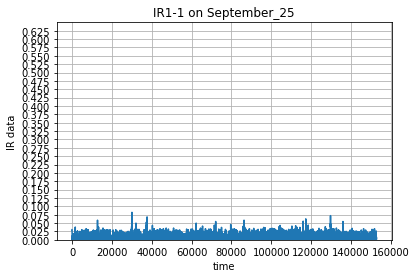

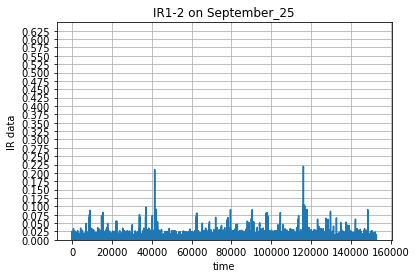

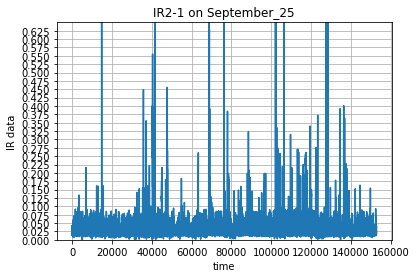

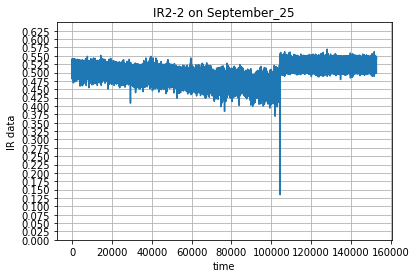

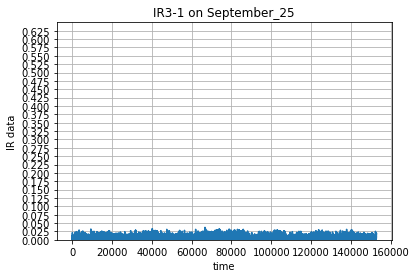

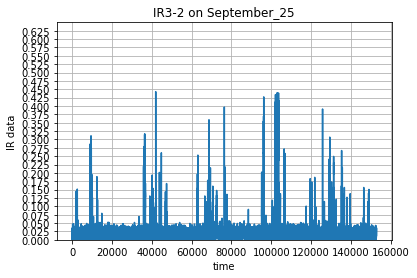

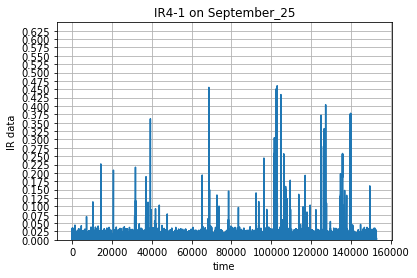

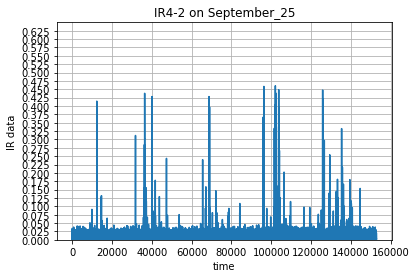

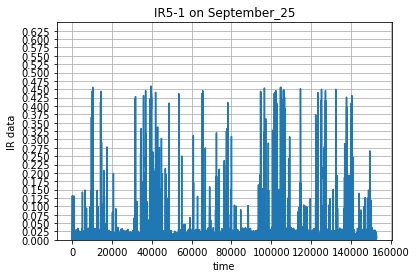

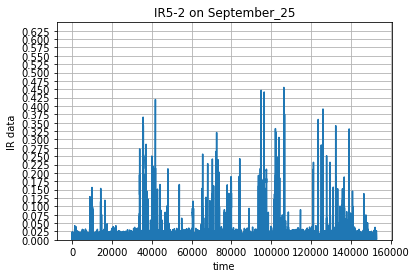

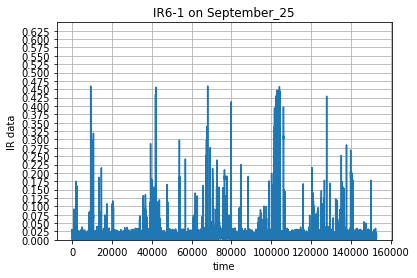

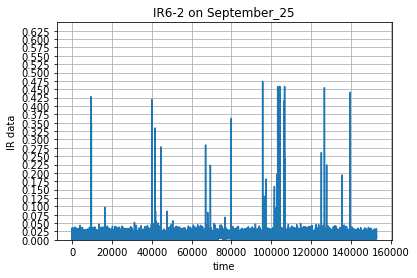

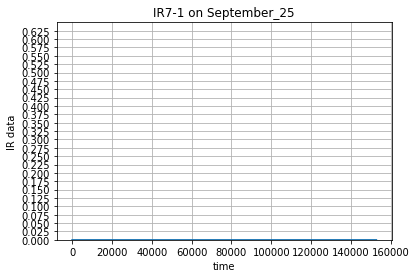

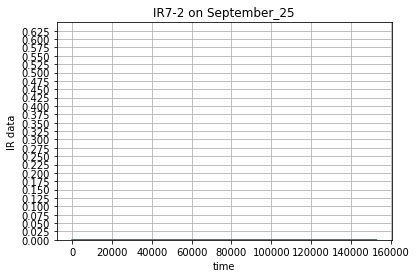

In [ ]:
import glob
raw_sensor_data_files = glob.glob('raw_sensor_data_from_master_script/*.csv')
raw_sensor_data_files.sort()
raw_sensor_data = {}
for file in raw_sensor_data_files:
    print('Loading: {}'.format(file))
    # 1. load sensro data
    raw_sensor_data[file] = pd.read_csv(file, skiprows=4)
    
    # 2. Get start time
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for i in range(4):
            tmp = next(reader)
            #print(tmp)
            if i == 2:
                line_with_time = tmp
    _, start_time = line_with_time[0].split(':')
    datetime_format = '%Y-%m-%d %H:%M:%S'
    start_time = float(start_time)
    start_time_datetime_format = datetime.fromtimestamp(start_time).strftime(datetime_format)
    #print('start_time_datetime_format = {}'.format(start_time_datetime_format))
    
    # 3. Convert relative time to timestamp
    raw_sensor_data[file]['timestamp'] = start_time + raw_sensor_data[file]['timestamp']
    
    # 4. Convert timestamp to readable datatime
    raw_sensor_data[file]['timestamp'] = raw_sensor_data[file]['timestamp'].apply(pd.Timestamp.fromtimestamp)
    
    
    # 5. drop last column which contain NON
    raw_sensor_data[file] = raw_sensor_data[file].drop([raw_sensor_data[file].columns[-1]], axis=1)
    
    # 6. plot each IR
    date = file.split('__')[1].split('_2018')[0]
    ymin = 0
    ymax = 0.65  # If want to spot active interaction with higher value, please change it to higher value
    ystep = 0.025
    for col in raw_sensor_data[file].columns:
        if 'IR' in col:
            plt.figure()
            plt.plot(raw_sensor_data[file][col])
            plt.xlabel('time')
            plt.ylabel('IR data')
            plt.ylim(ymin, ymax)
            plt.yticks(np.arange(ymin,ymax,ystep))
            plt.title('{} on {}'.format(col, date))
            plt.grid(True)
            plt.show()
            
    #input("Press Enter to continue...")
    

## Read 'data_cleaning_remove_IR_baseline.csv'


In [ ]:
IR_baseline = pd.read_csv('data_cleaning_remove_IR_baseline.csv')
IR_baseline